# Importing libraries

In [49]:
import warnings
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
%matplotlib inline

# Loading data

In [50]:
train = pd.read_csv(r"Phising_Training_Dataset.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8955 entries, 0 to 8954
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   key                          8955 non-null   int64
 1   having_IP                    8955 non-null   int64
 2   URL_Length                   8955 non-null   int64
 3   Shortining_Service           8955 non-null   int64
 4   having_At_Symbol             8955 non-null   int64
 5   double_slash_redirecting     8955 non-null   int64
 6   Prefix_Suffix                8955 non-null   int64
 7   having_Sub_Domain            8955 non-null   int64
 8   SSLfinal_State               8955 non-null   int64
 9   Domain_registeration_length  8955 non-null   int64
 10  Favicon                      8955 non-null   int64
 11  port                         8955 non-null   int64
 12  HTTPS_token                  8955 non-null   int64
 13  Request_URL                  8955 non-null   int

In [51]:
train.head()

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,12344,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,12345,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,12346,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,12347,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,12348,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [52]:
train.describe()

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.00000,...,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000
mean,16821.000000,0.307203,-0.635734,0.740480,0.709436,0.740704,-0.735343,0.071803,0.264545,-0.33646,...,0.606700,0.829816,0.028922,0.371078,0.291792,-0.479397,0.712339,0.338582,0.728867,0.124288
std,2585.230164,0.951697,0.763660,0.672116,0.704809,0.671870,0.677733,0.817419,0.908003,0.94175,...,0.794975,0.558069,0.999637,0.928654,0.825557,0.877647,0.701874,0.576068,0.684694,0.992302
min,12344.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,14582.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.00000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,16821.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,19059.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,21298.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Exploration

3921 times -1 repeated in Result
5034 times 1 repeated in Result


<Axes: ylabel='count'>

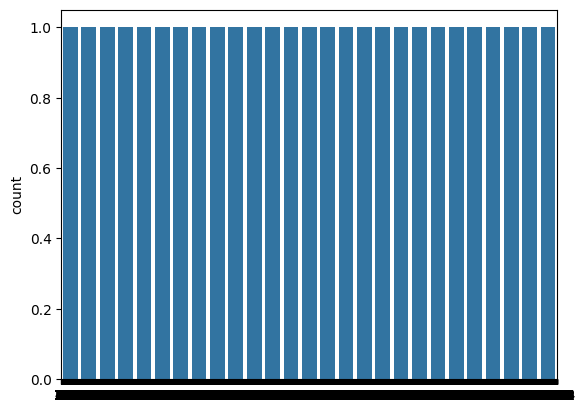

In [53]:
#Looking at the count of phishing and legitmate entries in our training dataset
a=len(train[train.Result==-1])
b=len(train[train.Result==1])
print(a,"times -1 repeated in Result")
print(b,"times 1 repeated in Result")
sns.countplot(train['Result'])

**Note:** From the above countplot the data isn't much imbalanced.

<Axes: >

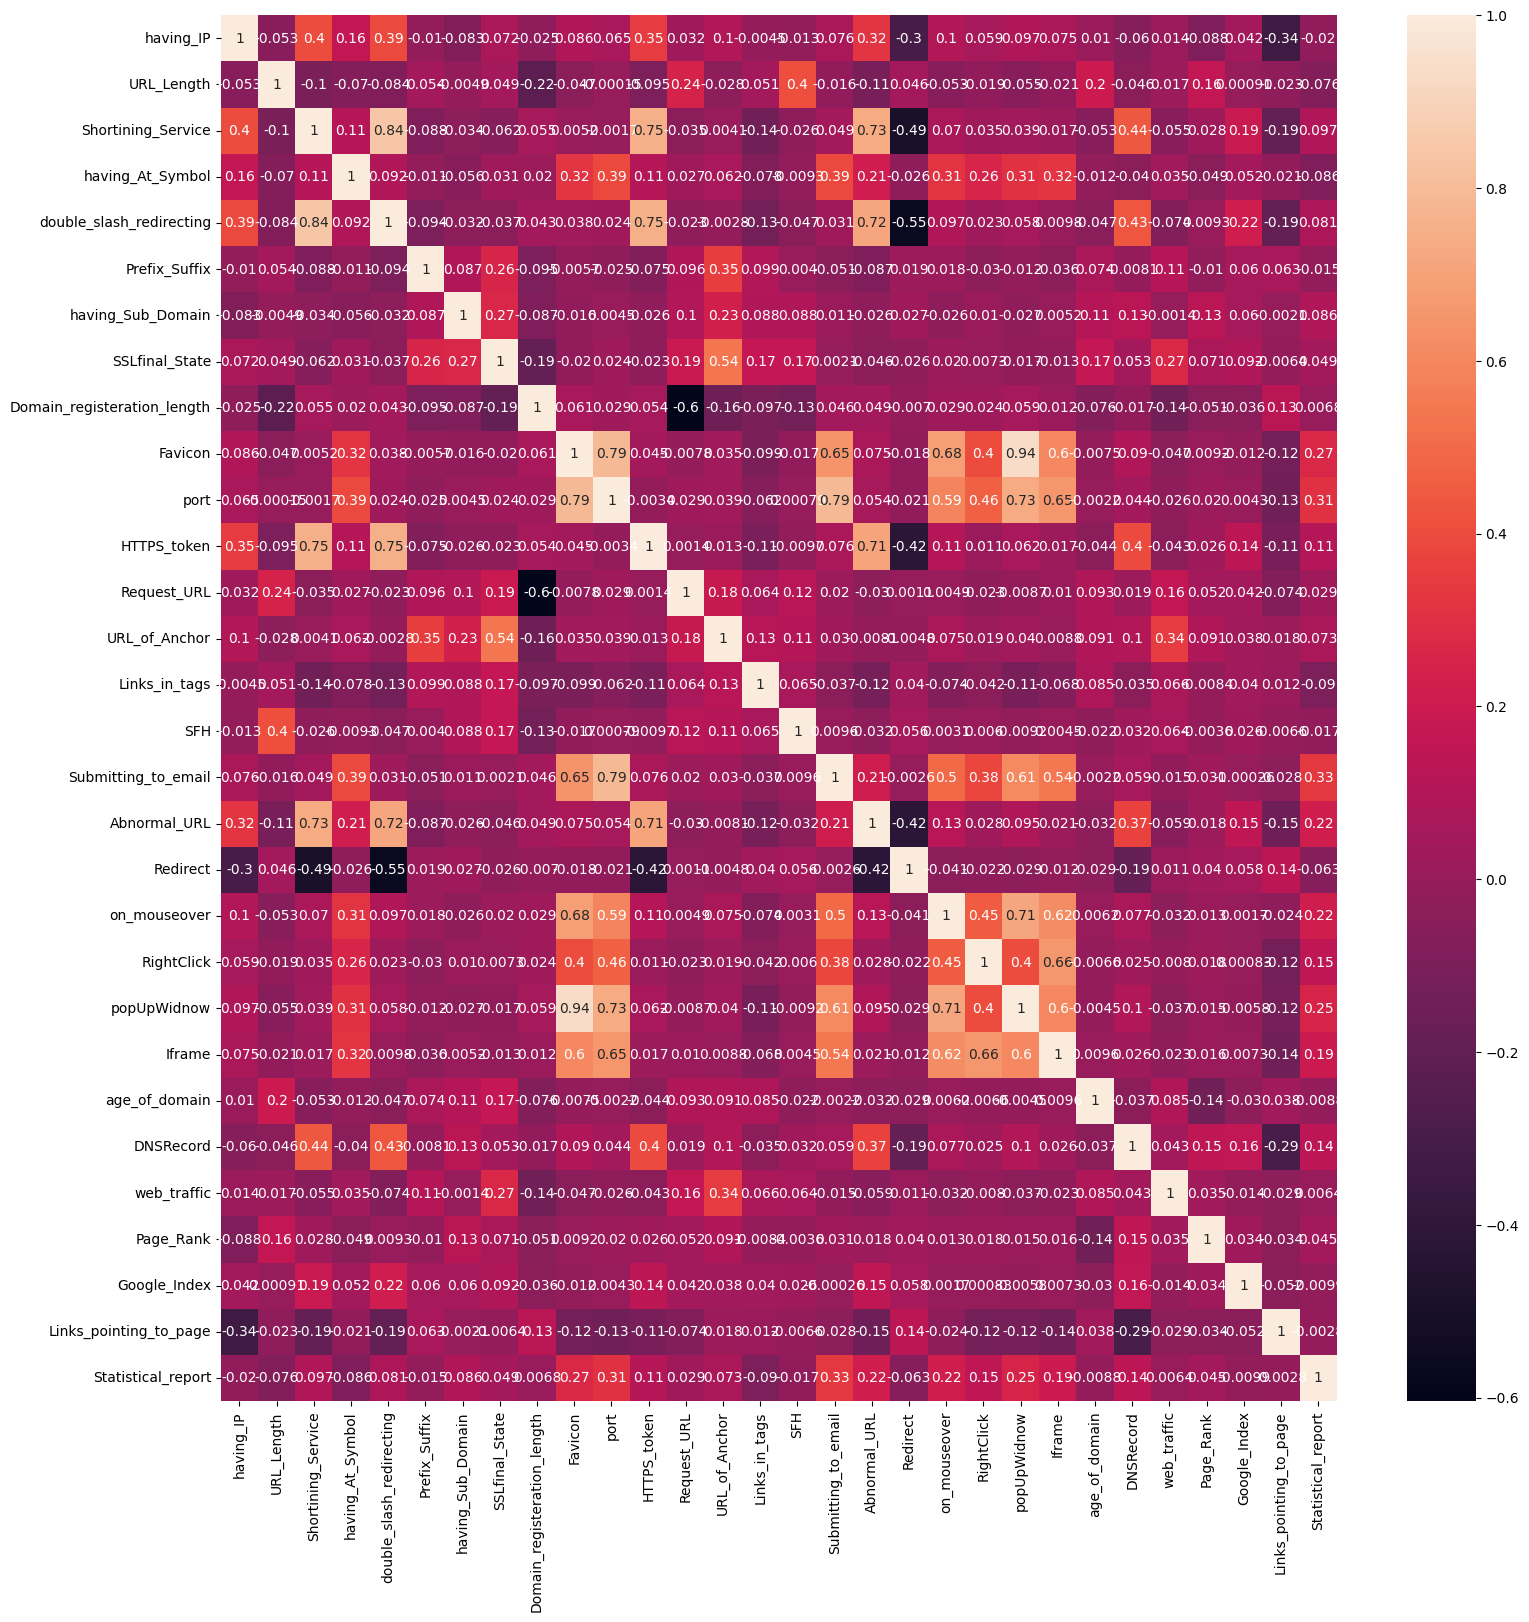

In [54]:
#looking at correlation between each feature
plt.figure(figsize=(18,18))
sns.heatmap(train.drop(['key', 'Result'], axis=1).corr(),annot=True)


<Axes: >

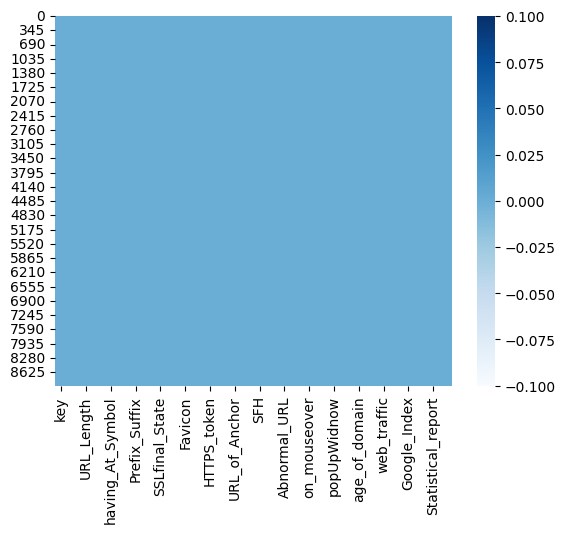

In [55]:
#Looking at the count of null values
sns.heatmap(train.isnull(),cmap='Blues')

Note: The dataset was already cleaned so null values

# Model building

In [56]:
#preparing the data for training
train = train.drop(columns=['key'])
X = train.drop('Result',axis=1).values 
y = train['Result'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [57]:
#Testing on the following classifiers
classifiers = [RandomForestClassifier(),
               LogisticRegression(max_iter=1000),
               DecisionTreeClassifier(),
               KNeighborsClassifier(), 
               SVC()]
for cls in classifiers:
    cls.fit(X_train, y_train)

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "RandomForest", 1: "Logistic",2: "DecisionTree", 3:"KNN", 4:"SVC"}

In [58]:
# Cossvalidation 
for i, model in enumerate(classifiers):
    cv_score = cross_val_score(model, X_train,y_train,scoring="f1", cv=10)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

RandomForest: 0.970939 
Logistic: 0.935491 
DecisionTree: 0.960076 
KNN: 0.940041 
SVC: 0.951115 


We will use Random Forest, Logistic Regression & Decision tree for Voting Classifier

# Model Evaluation

In [59]:
# creating lists of varios scores
precision =[]
recall =[]
f1_scores = []
trainset_accuracy = []
testset_accuracy = []

for i in classifiers:
    pred_train = i.predict(X_train)
    pred_test = i.predict(X_test)
    prec = metrics.precision_score(y_test, pred_test)
    recal = metrics.recall_score(y_test, pred_test)
    f1_s = metrics.f1_score(y_test, pred_test)
    train_accuracy = model.score(X_train,y_train)
    test_accuracy = model.score(X_test,y_test)
  
    #Appending scores
    precision.append(prec)
    recall.append(recal)
    f1_scores.append(f1_s)
    trainset_accuracy.append(train_accuracy)
    testset_accuracy.append(test_accuracy)

In [60]:
# initialise data of lists.
data = {'Precision':precision,
'Recall':recall,
'F1score':f1_scores,
'Accuracy on Testset':testset_accuracy,
'Accuracy on Trainset':trainset_accuracy}
# Creates pandas DataFrame.
Results = pd.DataFrame(data, index =["RandomForest", "LogisticRegression", "DecisionTree", "KNeighbours","SVC"])

In [61]:
cmap2 = ListedColormap(["#E2CCFF","#E598D8"])
Results.style.background_gradient(cmap=cmap2)

,Precision,Recall,F1score,Accuracy on Testset,Accuracy on Trainset
RandomForest,0.963356,0.987154,0.975110,0.944724,0.951563
LogisticRegression,0.930097,0.946640,0.938296,0.944724,0.951563
DecisionTree,0.955078,0.966403,0.960707,0.944724,0.951563
KNeighbours,0.933270,0.967391,0.950024,0.944724,0.951563
SVC,0.941063,0.962451,0.951637,0.944724,0.951563


# Hard Voting Classifier

In [62]:
#Train the model using training data 
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
Classifier=VotingClassifier(estimators=[('lr',lr),('rf',rf),('dt',dt)],voting='hard')
Classifier.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('rf', RandomForestClassifier()),
                             ('dt', DecisionTreeClassifier())])

In [63]:
#Test the model using testing data
predictions = Classifier.predict(X_test)

In [64]:
#Test the model using testing data
predictions = Classifier.predict(X_test)
print("f1 score:",f1_score(y_test,predictions,average='weighted'))
print("Accuracy: ",100.0 *accuracy_score(y_test,predictions))
print("Matthews correlation coefficient:",matthews_corrcoef(y_test,predictions))

f1 score: 0.969811060337163
Accuracy:  96.98492462311557
Matthews correlation coefficient: 0.9386707398896922


<Axes: >

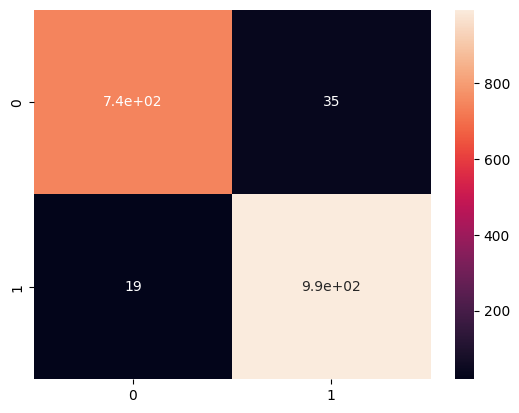

In [65]:
cm=confusion_matrix(y_test,predictions)
sns.heatmap(cm,annot=True)

# Soft Voting Classifier

In [66]:
#Train the model using training data 
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
Classifier=VotingClassifier(estimators=[('lr',lr),('rf',rf),('dt',dt)],voting='soft')
Classifier.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('rf', RandomForestClassifier()),
                             ('dt', DecisionTreeClassifier())],
                 voting='soft')

In [67]:
#Test the model using testing data
predictions = Classifier.predict(X_test)
print("f1 score:",f1_score(y_test,predictions,average='weighted'))
print("Accuracy: ",100.0 *accuracy_score(y_test,predictions))
print("Matthews correlation coefficient:",matthews_corrcoef(y_test,predictions))

f1 score: 0.9664510314183754
Accuracy:  96.64991624790619
Matthews correlation coefficient: 0.931858892182


<Axes: >

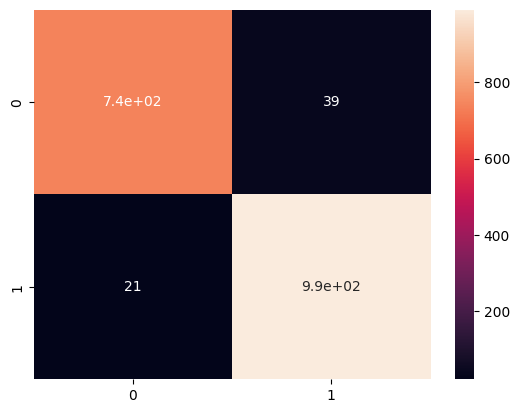

In [68]:
cm=confusion_matrix(y_test,predictions)
sns.heatmap(cm,annot=True)

In [69]:
import joblib
# Save the trained Voting Classifier model
joblib.dump(Classifier, 'voting_classifier_model.pkl')


['voting_classifier_model.pkl']

In [70]:
print(train.columns)
print(len(train.columns)-2)

Index(['having_IP', 'URL_Length', 'Shortining_Service', 'having_At_Symbol',
       'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain',
       'SSLfinal_State', 'Domain_registeration_length', 'Favicon', 'port',
       'HTTPS_token', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report', 'Result'],
      dtype='object')
29


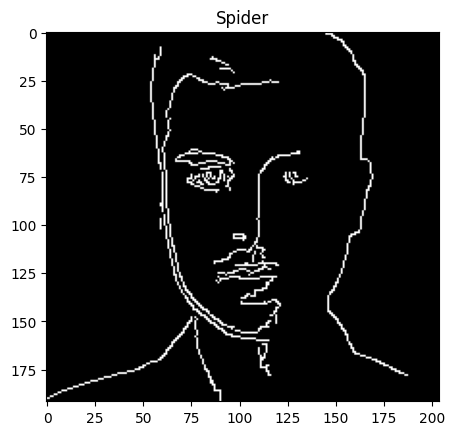

In [71]:
import cv2
import matplotlib.pyplot as plt
# Open the image
img = cv2.imread(r"C:\Users\agraw\Downloads\download.jpeg")
# Apply Canny
edges = cv2.Canny(img, 100, 200, 3, L2gradient=True)
plt.figure()
plt.title('Spider')
plt.imsave('dancing-spider-canny.png', edges, cmap='gray', format='png')
plt.imshow(edges, cmap='gray')
plt.show()

In [ ]:
import cv2
import numpy as np

# Let's load a simple image with 3 black squares
image = cv2.imread(r"C:\Users\agraw\Downloads\download.jpeg")
cv2.waitKey(0)

# Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Find Canny edges
edged = cv2.Canny(gray, 30, 200)
cv2.waitKey(0)

# Finding Contours
# Use a copy of the image e.g. edged.copy()
# since findContours alters the image
contours, hierarchy = cv2.findContours(edged,
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

cv2.imshow('Canny Edges After Contouring', edged)
cv2.waitKey(0)

print("Number of Contours found = " + str(len(contours)))

# Draw all contours
# -1 signifies drawing all contours
cv2.drawContours(image, contours, -1, (0, 255, 0), 3)

cv2.imshow('Contours', image)
cv2.waitKey(0)
cv2.destroyAllWindows()